In [10]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

In [2]:
DATASET_DIR = Path('/home/jovyan/jigsaw-toxic/data/datasets/c3')

In [7]:
!cp /home/jovyan/jigsaw-toxic/data/jigsaw-toxic-severity-rating/valid.csv $DATASET_DIR/valid.csv

In [4]:
!ls -la $DATASET_DIR

total 12624
drwxr-xr-x  2 jovyan users     4096 Feb  6 17:15 .
drwxr-xr-x 15 jovyan users     4096 Feb  6 17:15 ..
-rw-r--r--  1 jovyan users 12917597 Feb  6 17:15 C3_anonymized.csv


In [8]:
orig_df = pd.read_csv(DATASET_DIR / 'C3_anonymized.csv')
valid_df = pd.read_csv(DATASET_DIR / 'valid.csv')

In [14]:
valid_comment_set = set(valid_df['more_toxic'].unique()) | set(valid_df['less_toxic'].unique())

In [9]:
orig_df

,article_id,comment_author,comment_counter,comment_text,njudgements_constructiveness_expt,njudgements_toxicity_expt,agree_constructiveness_expt,agree_toxicity_expt,constructive,crowd_toxicity_level,...,constructive_characteristics,non_constructive_characteristics,toxicity_characteristics,crowd_comments_constructiveness_expt,crowd_comments_toxicity_expt,other_con_chars,other_noncon_chars,other_toxic_chars,constructive_binary,pp_comment_text
0,26023945,0,source1_26023945_62,And this Conservative strategy has produced th...,3.0,3.0,0.17,0.50,1.0,4.0,...,specific_points:3\ndialogue:2,no_non_con:3\nprovocative:1,abusive:3\npersonal_attack:1\nteasing:1\nembar...,\n\n,\n\n,\n\n,\n\n,\n\n,1.0,And this Conservative strategy has produced th...
1,24565777,1,source1_24565777_106,I commend Harper for holding the debates outsi...,3.0,3.0,0.33,0.17,1.0,3.0,...,specific_points:3\ndialogue:2,no_non_con:2\nno_respect:1,abusive:1\npersonal_attack:1\nteasing:1\nembar...,\n\n,\n\n,\n\n,\n\n,\n\n,1.0,I commend Harper for holding the debates outsi...
2,28775443,2,source1_28775443_136,What a joke Rachel Notley is. This is what was...,3.0,3.0,0.83,0.00,1.0,3.0,...,specific_points:2\ndialogue:1,no_non_con:2\nprovocative:1,personal_attack:3\ninflammatory:3\nteasing:3\n...,\n\n,\n\n,\n\n,\n\n,\n\n,1.0,What a joke Rachel Notley is . This is what wa...
3,8996700,3,source1_8996700_50,Do you need to write an essay to prove the poi...,3.0,3.0,1.00,0.83,1.0,3.0,...,dialogue:1\nevidence:1\nspecific_points:1,no_non_con:2\nnon_relevant:1,personal_attack:2\nteasing:2\nembarrassment:2\...,\n\n,\n\n,\n\n,\n\n,\n\n,1.0,Do you need to write an essay to prove the poi...
4,29405071,4,source1_29405071_126,Rob Ford was no saint. He should never have be...,3.0,3.0,0.83,0.33,1.0,3.0,...,specific_points:3\nsolution:1,no_non_con:3,teasing:3\npersonal_attack:2\nabusive:1\nembar...,\n\n,\n\n,\n\n,\n\n,\n\n,1.0,Rob Ford was no saint . He should never have b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,27047599,5518,source1_27047599_144,How many Liberal MP's have some affiliation to...,5.0,5.0,0.20,0.30,0.0,1.0,...,no_con:3\ndialogue:2,no_non_con:3\nnon_relevant:2\nno_respect:1\nun...,no_toxic:5,\n\n\n\n,\n\n\n\n,\n\n\n\n,\n\n\n\n,\n\n\n\n,0.0,How many Liberal MPs have some affiliation to ...
11996,27047599,635,source1_27047599_56,Ontario certainly has the government they dese...,5.0,5.0,0.30,0.50,0.0,1.0,...,no_con:4\nspecific_points:1,no_non_con:2\nunsubstantial:2\nnon_relevant:1\...,no_toxic:5,\n\n\n\n,\n\n\n\n,\n\n\n\n,\n\n\n\n,\n\n\n\n,0.0,Ontario certainly has the government they dese...
11997,27047599,2058,source1_27047599_63,4th grade teachers....proud members of the 1%!,5.0,5.0,0.30,0.30,0.0,1.0,...,no_con:3\nspecific_points:1\ndialogue:1,non_relevant:2\nno_non_con:1\nsarcastic:1\npro...,no_toxic:5,\n\n\n\n,\n\n\n\n,\n\n\n\n,\n\n\n\n,\n\n\n\n,0.0,4th grade teachers ... .proud members of the 1...
11998,27047599,1585,source1_27047599_18,The Kathleen McGuinty government has a sweethe...,5.0,5.0,0.20,1.00,0.0,1.0,...,no_con:2\npersonal_story:1\nspecific_points:1\...,no_non_con:2\nsarcastic:1\nunsubstantial:1\nno...,no_toxic:5,\n\n\n\n,\n\n\n\n,\n\n\n\n,\n\n\n\n,\n\n\n\n,0.0,The Kathleen McGuinty government has a sweethe...


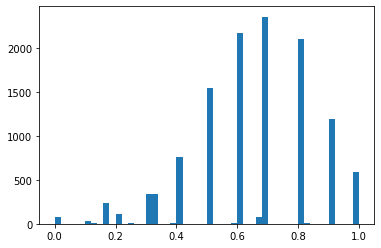

In [11]:
plt.hist(orig_df['agree_toxicity_expt'], bins=50);

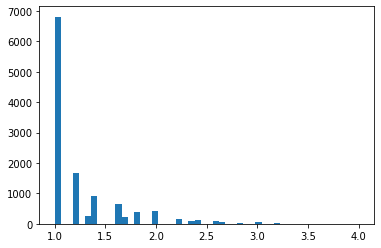

In [12]:
plt.hist(orig_df['crowd_toxicity_level'], bins=50);

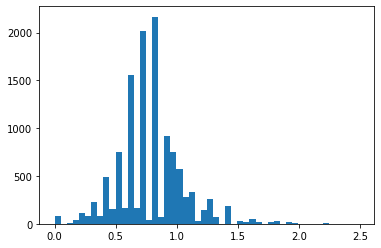

In [13]:
plt.hist(orig_df['agree_toxicity_expt'] * orig_df['crowd_toxicity_level'], bins=50);

In [15]:
set(orig_df['comment_text'].unique()) & valid_comment_set

set()

In [25]:
def generate_scores(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df['agree_toxicity_expt_score'] = (df['agree_toxicity_expt'] - df['agree_toxicity_expt'].min()) / (df['agree_toxicity_expt'].max() - df['agree_toxicity_expt'].min())
    df['crowd_toxicity_level_score'] = (df['crowd_toxicity_level'] - df['crowd_toxicity_level'].min()) / (df['crowd_toxicity_level'].max() - df['crowd_toxicity_level'].min())
    df['aggregated_score'] = df['agree_toxicity_expt'] * df['crowd_toxicity_level']
    df['aggregated_score'] = (df['aggregated_score'] - df['aggregated_score'].min()) / (df['aggregated_score'].max() - df['aggregated_score'].min())
    return df[['comment_text', 'agree_toxicity_expt_score', 'crowd_toxicity_level_score', 'aggregated_score']]

In [26]:
train_df = generate_scores(orig_df)

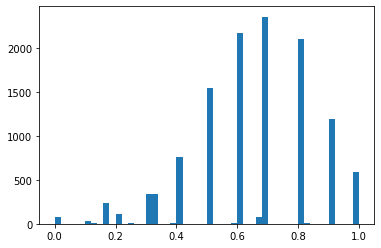

In [27]:
plt.hist(train_df['agree_toxicity_expt_score'], bins=50);

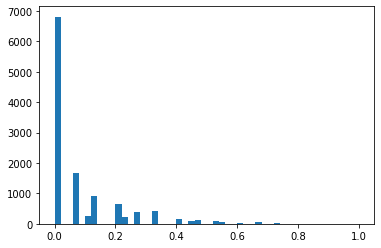

In [28]:
plt.hist(train_df['crowd_toxicity_level_score'], bins=50);

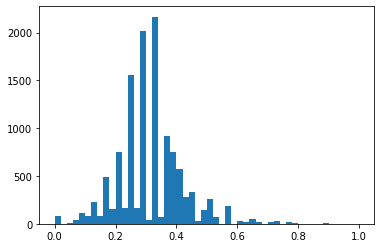

In [29]:
plt.hist(train_df['aggregated_score'], bins=50);

In [31]:
train_df.to_csv(DATASET_DIR / 'train_reg.csv', index=False)

In [32]:
!ls -la $DATASET_DIR

total 26392
drwxr-xr-x  2 jovyan users     4096 Feb  6 17:52 .
drwxr-xr-x 15 jovyan users     4096 Feb  6 17:15 ..
-rw-r--r--  1 jovyan users 12917597 Feb  6 17:15 C3_anonymized.csv
-rw-r--r--  1 jovyan users  5462728 Feb  6 17:52 train_reg.csv
-rw-r--r--  1 jovyan users  8633656 Feb  6 17:18 valid.csv
